In [1]:
import numpy as np
from math import sqrt

from mlgrad.cluster import KMeans, KMeansMahalanobis

In [2]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [3]:
X_iris, Y_iris = datasets.load_iris(return_X_y=True)

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
pca.fit(X_iris)
X = pca.transform(X_iris)
Y = Y_iris

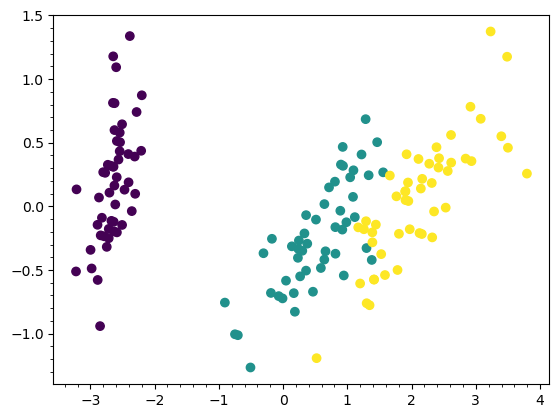

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.minorticks_on()
plt.show()

In [7]:
def get_range(a, q=20):
    amin, amax = min(a), max(a)
    h = (amax - amin) / q
    return amin - h, amax + h

xmin, xmax = get_range(X[:,0])
ymin, ymax = get_range(X[:,1])
XX, YY = np.meshgrid(
            np.linspace(xmin, xmax, 100), 
            np.linspace(ymin, ymax, 100))
XY = np.c_[(XX.ravel(), YY.ravel())]

In [8]:
km = KMeans(3)

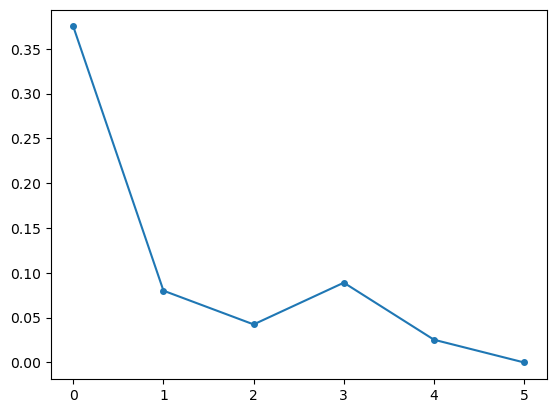

In [9]:
km.fit(X)
plt.plot(km.dvals, marker='o', markersize=4)
plt.show()

In [10]:
# U = np.array([[1,2,3],[3,4,5]])
# (U * U).sum(axis=1)
# U.T.argmin(axis=1)

In [11]:
print(km.K)
print(km.c)

6
[[-2.642  0.191]
 [ 2.347  0.274]
 [ 0.666 -0.332]]


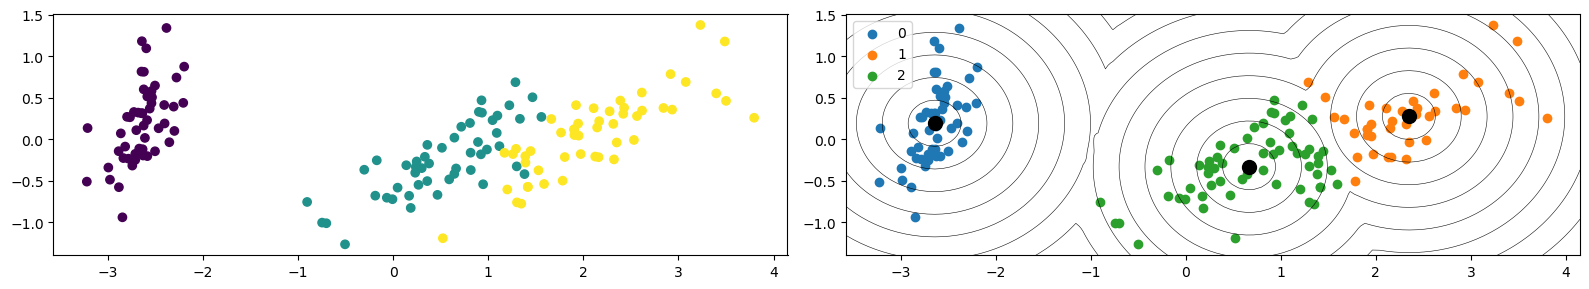

In [12]:
plt.figure(figsize=(16,3), )
plt.subplot(1,2,1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.subplot(1,2,2)
for j, Ij in enumerate(km.Is):
    Xj = X[Ij]
    plt.scatter(Xj[:,0], Xj[:,1], label=str(j))
plt.scatter(km.c[:,0], km.c[:,1], c='k', s=100)

Z = np.sqrt(km.eval_dists(XY))
# Z = np.fromiter((km.dist(xy) for xy in XY), 'd', len(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 10), 
            extent=(xmin,xmax,ymin,ymax), linewidths=0.4, alpha=0.95, colors='k')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.legend()
plt.tight_layout()
plt.show()

In [13]:
def mdist2(x, S1):
    return (S1 @ x) @ x

In [14]:
kmm = KMeansMahalanobis(3)

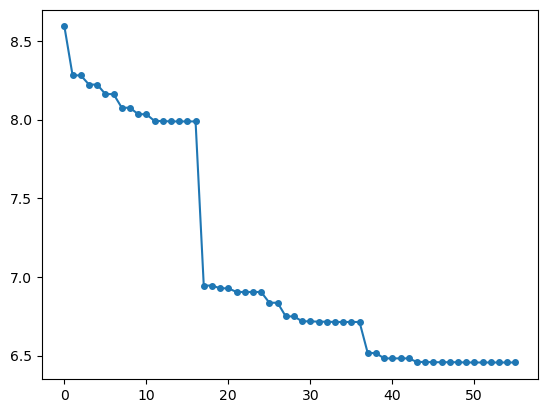

In [15]:
kmm.fit(X)

plt.plot(kmm.qvals, marker='o', markersize=4)
plt.show()

In [16]:
# print(kmm.K)
# print(kmm.c)
# print(kmm.S1)

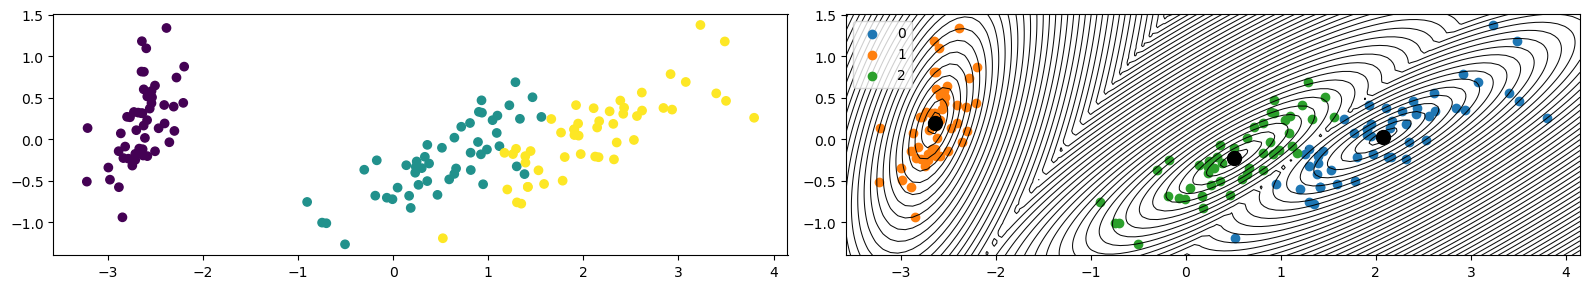

In [17]:
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.subplot(1,2,2)
for j, Ij in enumerate(kmm.Is):
    Xj = X[Ij]
    plt.scatter(Xj[:,0], Xj[:,1], label=str(j))
plt.scatter(kmm.c[:,0], kmm.c[:,1], c='k', s=100)

Z = np.sqrt(kmm.eval_dists(XY))
# Z = np.fromiter((kmm.dist(xy) for xy in XY), 'd', len(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 50), extent=(xmin,xmax,ymin,ymax), linewidths=0.75, alpha=0.95, colors='k')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.legend()
plt.tight_layout()
plt.show()

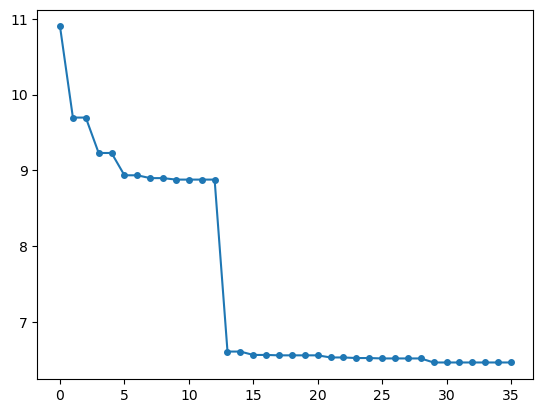

In [18]:
kmm3 = KMeansMahalanobis(3)
kmm3.fit(X_iris)

plt.plot(kmm3.qvals, marker='o', markersize=4)
plt.show()

In [19]:
Y3 = kmm3.predict(X_iris)

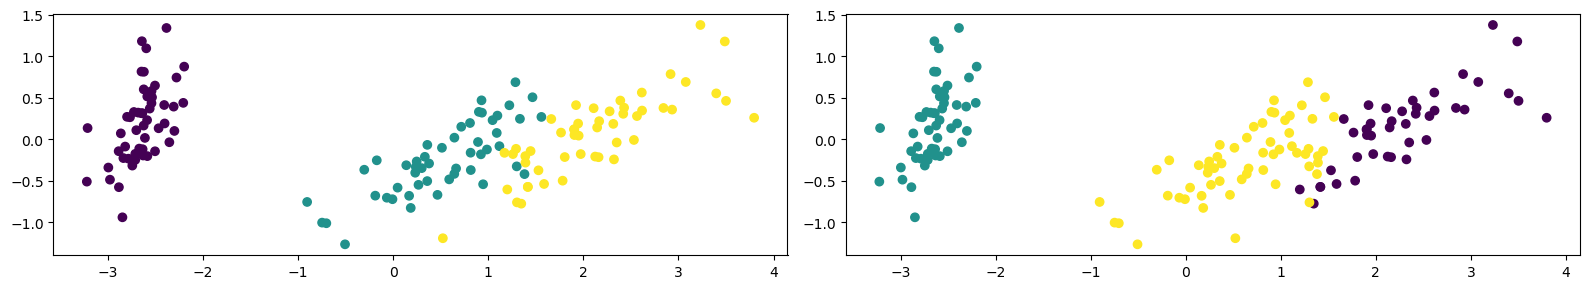

In [20]:
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=Y3)
plt.tight_layout()
plt.show()

In [21]:
X = np.arange(10).reshape(5,2)
print(X)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
